In [1]:
%reset -f

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy
from scipy.stats import skewnorm, ttest_ind
import pandas as pd

In [3]:
# Creating two normally distributed arrays for Target and Control Groups
tg_size = 50
cg_size = 50

np.random.seed(13)

tg = np.random.normal(loc=37, scale=3, size=tg_size)
cg = np.random.normal(loc=36.5, scale=3, size=cg_size)

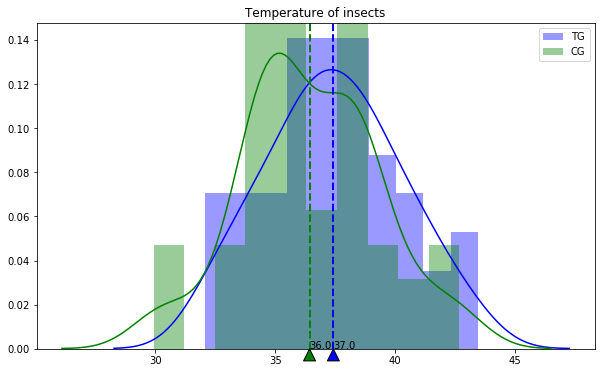

In [4]:
# Calculating mean values for Target and Control Groups
tg_mean = np.mean(tg)
cg_mean = np.mean(cg)

# Creating Distributions plot for our arrays
fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(tg, bins=10, ax=ax, label='TG', color='b')
sns.distplot(cg, bins=10, ax=ax, label='CG', color='g')

ax.axvline(linewidth=2, linestyle='--', color='b', x=tg_mean)
ax.axvline(linewidth=2, linestyle='--', color='g', x=cg_mean)

plt.title('Temperature of insects')
plt.legend()

# Adding annotations
ax.annotate(str(round(tg_mean,0)), xy=(tg_mean, 0), xytext=(tg_mean, 0), arrowprops=dict(facecolor='b', shrink=0.05),)
ax.annotate(str(round(cg_mean,0)), xy=(cg_mean, 0), xytext=(cg_mean, 0), arrowprops=dict(facecolor='g', shrink=0.05),)

# Saving plot
fig.savefig('distplot_normal.png')

plt.show()

In [5]:
round(tg_mean,0), round(cg_mean,0)

(37.0, 36.0)

In [7]:
np.std(cg)

2.7875406942501542

### Student test

In [30]:
from scipy.stats import ttest_ind
ttest_ind(tg,cg)

Ttest_indResult(statistic=1.7619330756205609, pvalue=0.08119890809752231)

### Mann-Whitney test

In [31]:
from scipy.stats import mannwhitneyu

mannwhitneyu(tg, cg)

MannwhitneyuResult(statistic=1007.0, pvalue=0.04728668486172901)

### T test and MW 

In [11]:
def get_results(size=50):
    
    tg_size = size
    cg_size = size
    
    tg = np.random.normal(loc=37, scale=3, size=tg_size)
    cg = np.random.normal(loc=36.5, scale=3, size=cg_size)
    
    t_test = ttest_ind(tg,cg)
    mw_test = mannwhitneyu(tg, cg)
    
    return t_test.pvalue, mw_test.pvalue

In [13]:
t_test_res = []
mw_test_res = []

test_results = pd.DataFrame(columns=['t_test', 'mw_test'])

for i in range(10000):
    
    rr = get_results()
    test_results.loc[test_results.shape[0]] = [rr[0], rr[1]]

In [33]:
test_results.head(3)

,t_test,mw_test
0,0.619252,0.449258
1,0.229163,0.068690
2,0.021894,0.017302


In [27]:
crit = 0.01
discr = test_results[((test_results['t_test']<crit)|(test_results['mw_test']<crit))
            &((test_results['t_test']>crit)|(test_results['mw_test']>crit))].shape[0]

In [29]:
discr

262

In [28]:
discr/10000*100

2.62

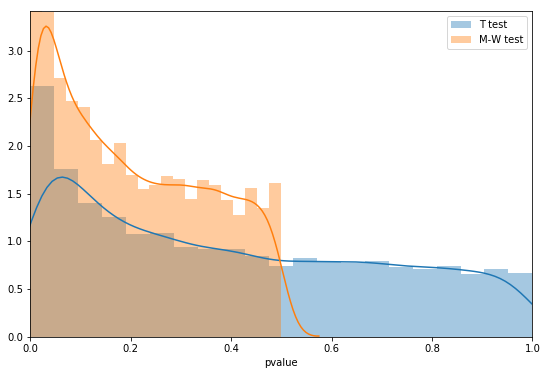

In [17]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.distplot(test_results['t_test'], label='T test', ax=ax)
sns.distplot(test_results['mw_test'], label='M-W test', ax=ax)

plt.xlabel('pvalue')
# plt.label('T-test and M-W test comparison')
plt.legend()
plt.xlim((0, 1))
fig.savefig('tests_comparison.png')

plt.show()

### Formulas

\begin{equation*}
T = \frac{\mu_{tg} - \mu_{cg}}{\sqrt{\frac{s_{tg}}{n_{tg}}+\frac{s_{cg}}{n_{cg}}}}
\end{equation*}

\begin{equation*}
T = \frac{\mu_{tg} - \mu_{cg}}{\sqrt{\frac{s_{tg}+s_{cg}}{n}}} = \frac{(\mu_{tg} - \mu_{cg})*\sqrt{n}}{\sqrt{s_{tg}+s_{cg}}}
\end{equation*}

## 1

In [21]:
df = pd.DataFrame({'id':[1, 2, 3, 4], 
                   'amt':[8, 7, 6, 5], 
                   'group':[1, 1, 1, 1]})

In [22]:
# df['group'] = df['group'].replace({1:'before treament', 2:'after treatment'})
df['id'] = df['id'].replace({1:'До приема', 2:'1 месяц', 3:'2 месяца', 4:'3 месяца'})

In [4]:
import matplotlib

C:\Users\a_abdraimov\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


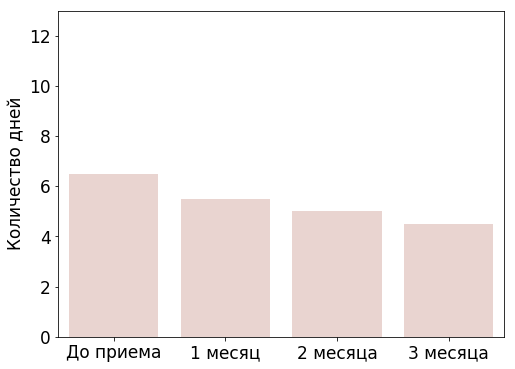

In [52]:
font = {'family' : 'normal',
        'weight' : 'medium',
        'size'   : 17}

matplotlib.rc('font', **font)


# Creating Distributions plot for our arrays
fig, ax = plt.subplots(figsize=(8,6))

g = sns.barplot(x="id", y="amt", hue="group", data=df, palette=sns.cubehelix_palette(8))

# vals = ax.get_yticks()
# ax.set_yticklabels(['{:,}'.format(x) for x in vals])

plt.ylim((0, 13))
# plt.legend()
plt.ylabel('Количество дней')
plt.xlabel('')

ax.legend().set_visible(False)

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.savefig('forMatata_1.png', transparent=True)
plt.show()

## 2

In [46]:
df = pd.DataFrame({'id':[1, 2, 3, 4], 
                   'amt':[6.5, 5.5, 5.0, 4.5], 
                   'group':[1, 1, 1, 1]})

In [47]:
# df['group'] = df['group'].replace({1:'before treament', 2:'after treatment'})
df['id'] = df['id'].replace({1:'До приема', 2:'1 месяц', 3:'2 месяца', 4:'3 месяца'})

C:\Users\a_abdraimov\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


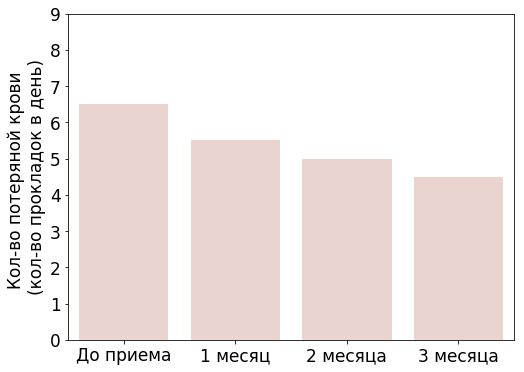

In [51]:
font = {'family' : 'normal',
        'weight' : 'medium',
        'size'   : 17}

matplotlib.rc('font', **font)


# Creating Distributions plot for our arrays
fig, ax = plt.subplots(figsize=(8,6))

g = sns.barplot(x="id", y="amt", hue="group", data=df, palette=sns.cubehelix_palette(8))

# vals = ax.get_yticks()
# ax.set_yticklabels(['{:,}'.format(x) for x in vals])

plt.ylim((0, 9))
# plt.legend()
plt.ylabel('Кол-во потеряной крови \n(кол-во прокладок в день)')
plt.xlabel('')

ax.legend().set_visible(False)

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.savefig('forMatata_2.png', transparent=True)
plt.show()

## 3

In [102]:
df = pd.DataFrame({'id':[1, 2, 3, 4, 1, 2, 3, 4], 
                   'amt':[36, 30, 22, 12, 14, 17, 25, 34], 
                   'group':[1, 1, 1, 1, 2, 2, 2, 2]})

In [103]:
df['group'] = df['group'].replace({1:'Присутствует', 2:'Отсутствует'})
df['id'] = df['id'].replace({1:'До приема', 2:'1 месяц', 3:'2 месяца', 4:'3 месяца'})

In [104]:
import matplotlib.font_manager as font_manager

C:\Users\a_abdraimov\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


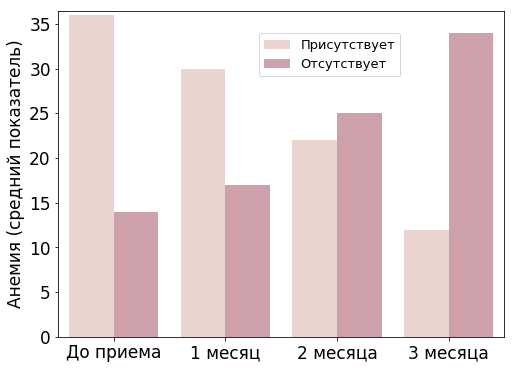

In [105]:
font = {'family' : 'normal',
        'weight' : 'medium',
        'size'   : 17}

matplotlib.rc('font', **font)


font_l = font_manager.FontProperties(family='normal',
                                   weight='medium',
                                   size=13)

fig, ax = plt.subplots(figsize=(8,6))

g = sns.barplot(x="id", y="amt", hue="group", data=df, palette=sns.cubehelix_palette(5))


plt.ylim((0, 36.5))
plt.ylabel('Анемия (средний показатель)')
plt.xlabel('')


plt.legend(bbox_to_anchor=(0.45, 0.93), loc=0, borderaxespad=0., prop=font_l)

fig.savefig('forMatata_3.png', transparent=True)
plt.show()

## 4

In [22]:
df = pd.DataFrame({'id':[1, 2], 
                   'amt':[0.81, 0.19], 
                   'group':[1, 1]})

In [23]:
# df['group'] = df['group'].replace({1:'before treament', 2:'after treatment'})
df['id'] = df['id'].replace({1:'Полное избавление', 2:'Частичное избавление'})

In [24]:
import matplotlib.font_manager as font_manager

C:\Users\a_abdraimov\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


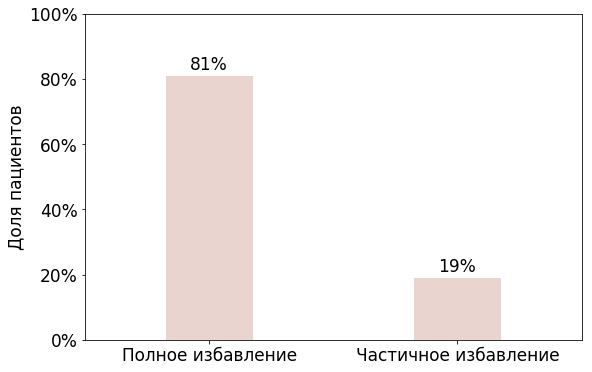

In [51]:
font = {'family' : 'normal',
        'weight' : 'medium',
        'size'   : 17}

matplotlib.rc('font', **font)


# Creating Distributions plot for our arrays
fig, ax = plt.subplots(figsize=(8.9,6))

g = sns.barplot(x="id", y="amt", hue="group", data=df, palette=sns.cubehelix_palette(8))

# vals = ax.get_yticks()
# ax.set_yticklabels(['{:,}'.format(x) for x in vals])

plt.ylim((0, 1))
# plt.legend()
plt.ylabel('Доля пациентов')
plt.xlabel('')

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.legend().set_visible(False)



def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)

# groupedvalues=df['amt'].reset_index()
# for index, row in groupedvalues.iterrows():
#     g.text(row.name,row.tip, round(row.total_bill,2), color='black', ha="center")

g.text(0,0.83, '81%', color='black', ha="center")
g.text(1,0.21, '19%', color='black', ha="center")
    
fig.savefig('forMatata_4.png', transparent=True)


plt.show()

## 5

In [52]:
df = pd.DataFrame({'id':[1, 2, 3, 1, 2, 3], 
                   'amt':[0.26, 0.51, 0.23, 0.90, 0.04, 0.06], 
                   'group':[1, 1, 1,2, 2,2]})

In [53]:
df['group'] = df['group'].replace({1:'До лечения', 2:'После лечения'})
df['id'] = df['id'].replace({1:'3-4 дня', 2:'5-8 дней', 3:'>8 дней'})

C:\Users\a_abdraimov\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


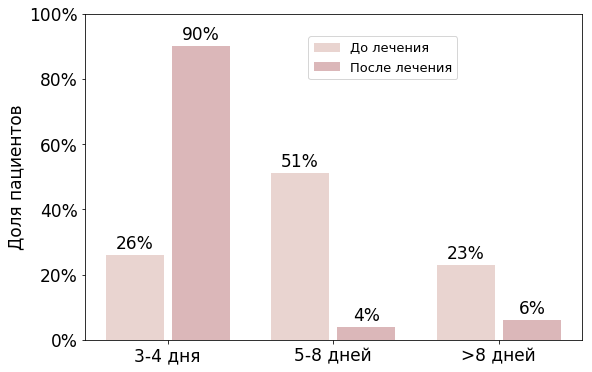

In [77]:
font = {'family' : 'normal',
        'weight' : 'medium',
        'size'   : 17}

matplotlib.rc('font', **font)

font_l = font_manager.FontProperties(family='normal',
                                   weight='medium',
                                   size=13)

# Creating Distributions plot for our arrays
fig, ax = plt.subplots(figsize=(8.9,6))

g = sns.barplot(x="id", y="amt", hue="group", data=df, palette=sns.cubehelix_palette(8))

# vals = ax.get_yticks()
# ax.set_yticklabels(['{:,}'.format(x) for x in vals])

plt.ylim((0, 1))
# plt.legend()
plt.ylabel('Доля пациентов')
plt.xlabel('')

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.legend().set_visible(False)



def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)

plt.legend(bbox_to_anchor=(0.45, 0.93), loc=0, borderaxespad=0., prop=font_l)
# groupedvalues=df['amt'].reset_index()
# for index, row in groupedvalues.iterrows():
#     g.text(row.name,row.tip, round(row.total_bill,2), color='black', ha="center")

g.text(-0.2,0.28, '26%', color='black', ha="center")
g.text(0.2,0.92, '90%', color='black', ha="center")

g.text(0.8,0.53, '51%', color='black', ha="center")
g.text(1.2,0.06, '4%', color='black', ha="center")

g.text(1.8,0.25, '23%', color='black', ha="center")
g.text(2.2,0.08, '6%', color='black', ha="center")
    
fig.savefig('forMatata_5.png', transparent=True)


plt.show()

In [8]:
arr = [27.2,5.7,68.8,84,10.9,6.9,
47,5.7,17.8,10.8,22.6,2.4,129.9,38.6,17,5.6,2.5,24.4,52.7,11.7,12.5,8.5,16.1,9.5,8.2,32.4,
39.7,9,21.2,24,13.5,13.5,4.5,5.5,9.2,7.5,12,6,11.5,6.5,16.2,16.2,41.9]

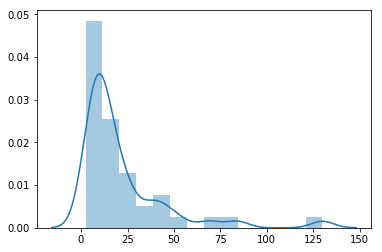

In [4]:
sns.distplot(arr)

In [10]:
np.median(arr)

12.5

In [13]:
np.percentile(arr, [25, 50, 60, 70, 80])

array([  7.85,  12.5 ,  16.2 ,  21.76,  30.32])